# Comprehensive Data Exploration for House Price Prediction

Link to the notebook

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.shape

(1460, 81)

In [5]:
np.prod(df.shape)

118260

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#  Important variables (according to me) after glancing through the columns of the dataset
# LotArea
# Neighborhood
# BldgType
# HouseStyle
# OverallQual
# YearBuilt
# TotalBsmtSF
# GrLivArea
# TotRmsAbvGrd
# GarageArea
# YrSold

# Looking at SalePrice ( our target )

In [8]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
print(df.SalePrice.median())

163000.0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

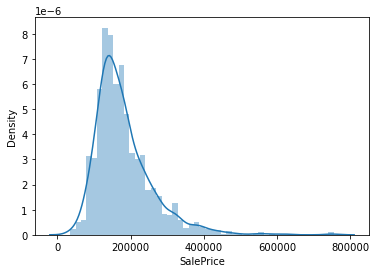

In [10]:
sns.distplot(df.SalePrice) #shows the distribution of the SalePrice

In [11]:
print(df.SalePrice.skew())  #Positively skewed
print(df.SalePrice.kurt())  #measure of tailedness ( tail is thick +vw or not -ve)

1.8828757597682129
6.536281860064529


# Relationship of SalePrice with Numeric vars

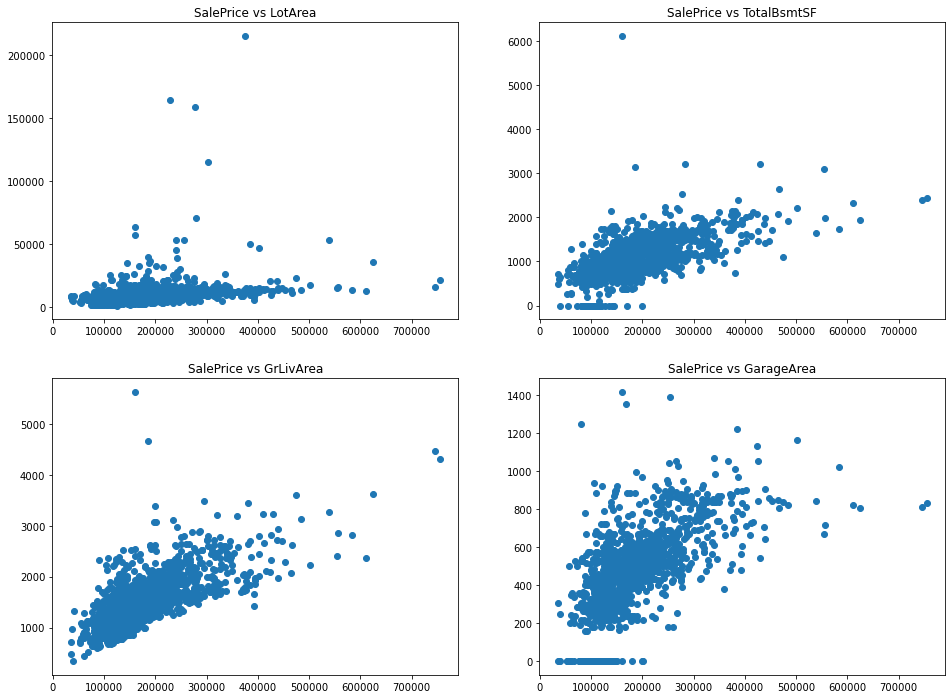

In [12]:
# for numeric data types we use scatter plots
plt.figure(figsize=(16,12))

x1 = df.LotArea
x2 = df.TotalBsmtSF
x3 = df.GrLivArea
x4 = df.GarageArea

y1 = df.SalePrice

plt.subplot(2,2,1)
plt.scatter(y1, x1)
plt.title('SalePrice vs LotArea')

plt.subplot(2,2,2)
plt.scatter(y1,x2)
plt.title('SalePrice vs TotalBsmtSF')

plt.subplot(2,2,3)
plt.scatter(y1,x3)
plt.title('SalePrice vs GrLivArea')

plt.subplot(2,2,4)
plt.scatter(y1,x4)
plt.title('SalePrice vs GarageArea')



plt.show()

In [13]:
# TotalBsmtSF , GrLivArea , GarageArea exhibit a linear relationship with the SalePrice

# Relationship of SalePrice with categorical data

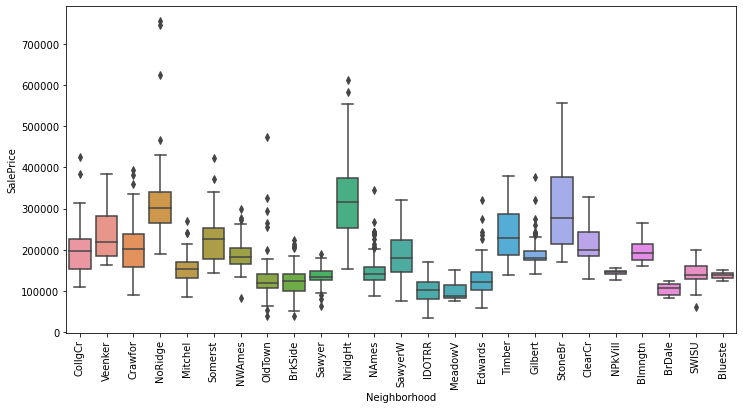

In [14]:
# to examine their relationship we use boxplots
plt.figure(figsize=(12,6))

sns.boxplot( x='Neighborhood', y='SalePrice', data=df )
plt.xticks(rotation=90);

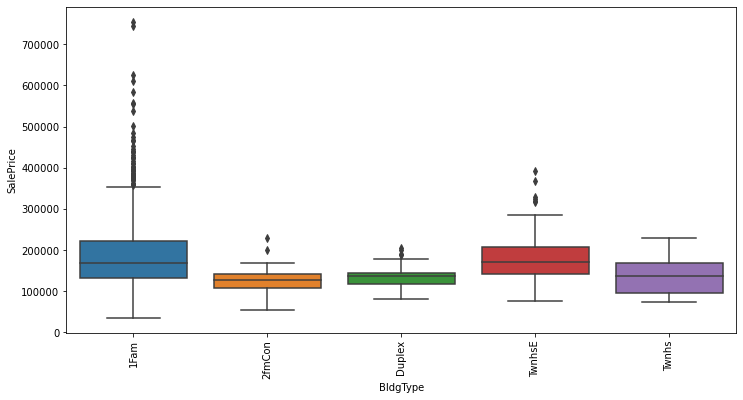

In [15]:
plt.figure(figsize=(12,6))

sns.boxplot( x='BldgType', y='SalePrice', data=df )
plt.xticks(rotation=90);

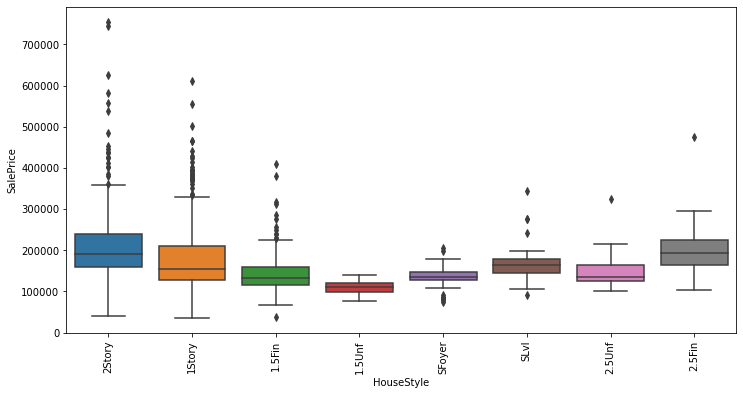

In [16]:
plt.figure(figsize=(12,6))

sns.boxplot( x='HouseStyle', y='SalePrice', data=df )
plt.xticks(rotation=90);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

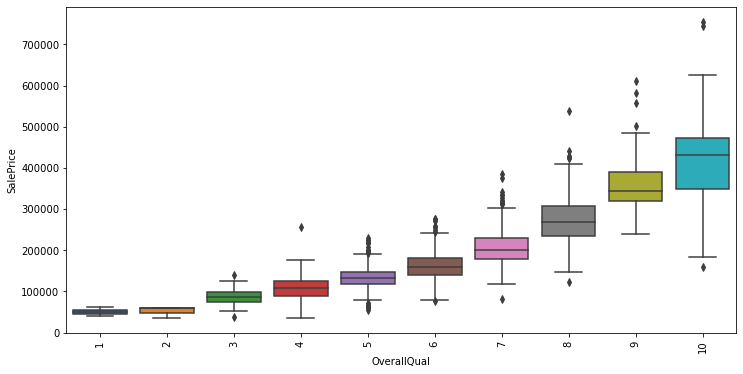

In [17]:
plt.figure(figsize=(12,6))

sns.boxplot( x='OverallQual', y='SalePrice', data=df )
plt.xticks(rotation=90)

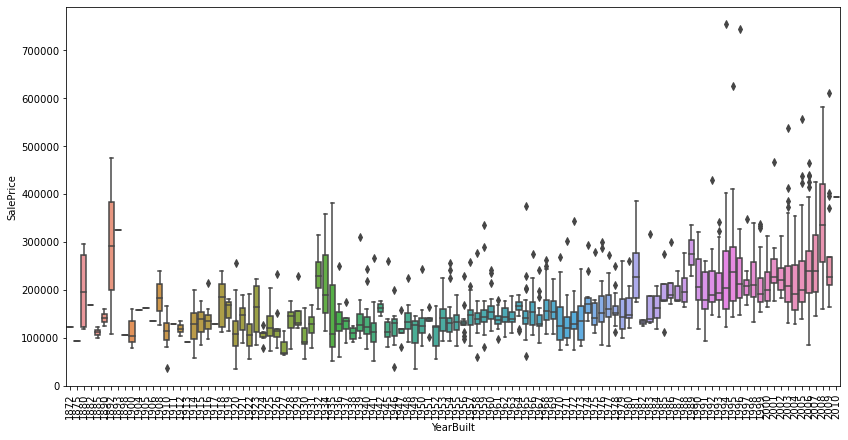

In [18]:
plt.figure(figsize=(12,6))

sns.boxplot( x='YearBuilt', y='SalePrice', data=df )
plt.tight_layout()
plt.xticks(rotation=90);

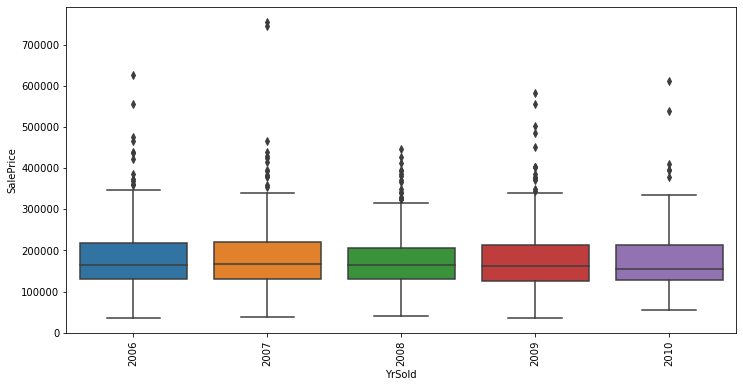

In [19]:
plt.figure(figsize=(12,6))

sns.boxplot( x='YrSold', y='SalePrice', data=df )
plt.xticks(rotation=90);

In [20]:
# We conclude 
# Certain Neighborhoods cost MORE
# BldgType and HouseStyle fail to show any strong relationship
# OverallQual increases as Price increases
# YearBuilt shows higher prices for recently built houses
# YrSold fails to show any relationship


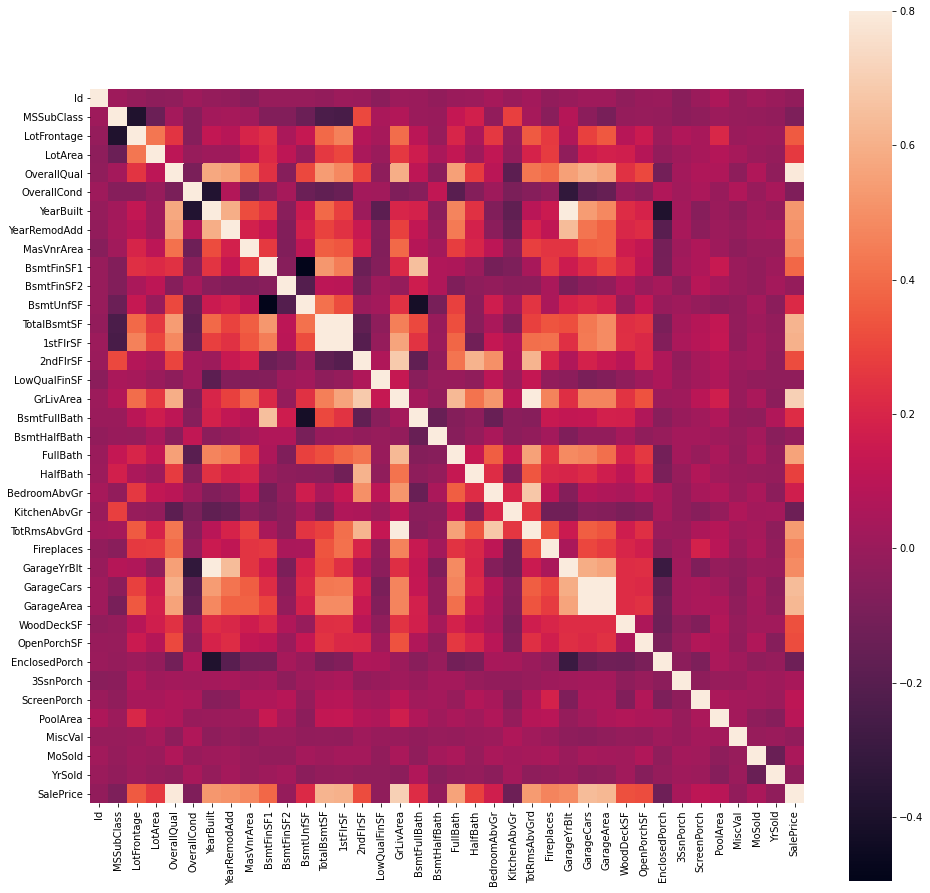

In [21]:
# Correlation Matrix
plt.figure(figsize=(16,16))
corrmatrix = df.corr()
sns.heatmap(corrmatrix, vmax=0.8, square=True)
plt.show()

In [22]:
# Observe the correlation values, TotalBsmtSF, 1stFlrSF are multicollinearly related
# GarageCars, GarageArea, GarageYrBlt are multicollinearly related

# Look at the SalePrice column and note down the cols which it corresponds with properly

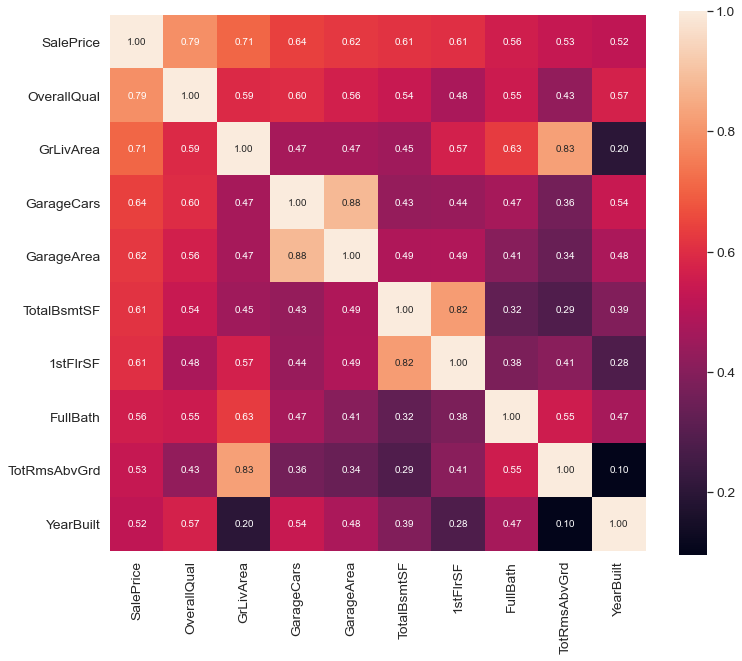

In [23]:
plt.figure(figsize=(12,10))
k=10
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [24]:
# OverQual GrlivArea GarageCars show high corr values with SalePrice
# GarageCars and GarageArea tells us the same relationship as they are high correlated themselves (look at the graph), it makes sense to include only one ofthem, discard other as redundant.
# Same principle for TotalBsmtSF and 1stFlrSF
# Same principle for TotRmsAbvGrd and GrLivArea

<Figure size 1008x864 with 0 Axes>

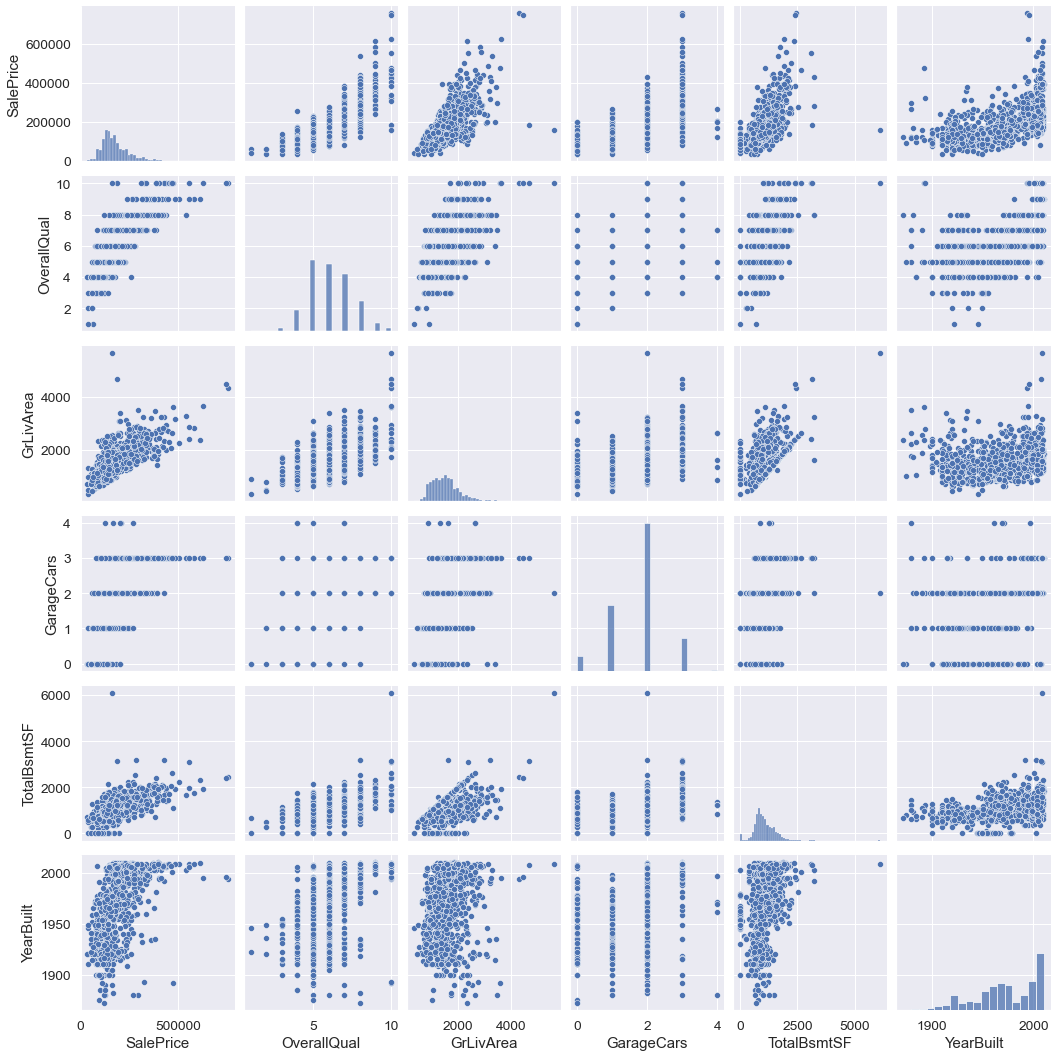

In [25]:
plt.figure(figsize=(14,12))

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF','YearBuilt']
sns.pairplot( df[cols] )
plt.show()

In [26]:
# take a brief moment of time and look at all possible good scatter plots


# Missing Data

In [27]:
df.shape
np.prod(df.shape)

118260

In [28]:
df.isnull().sum().sum()

6965

In [29]:
total_missing = df.isnull().sum().sum() / np.prod(df.shape)
total_missing

0.05889565364451209

In [30]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count() ).sort_values(ascending=False)
missing_data = pd.concat([ total,percent ], axis=1, keys = ['Total NaNs','Percent missing'])
print(df.shape)

(1460, 81)


In [31]:
missing_data.head(20)

,Total NaNs,Percent missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [32]:
(missing_data[missing_data['Total NaNs']>1]).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [33]:
df = df.drop((missing_data[missing_data['Total NaNs']>1]).index,1 )
df = df.drop( df.loc[df['Electrical'].isnull()].index )

In [34]:
df.isnull().sum().max()

0

In [35]:
df.shape

(1459, 63)

In [36]:
#We removed 18 columns and 1 row to eradicate all the missing data 

In [37]:
df.isnull().sum().sum()

0

# Outliers

In [38]:
# performing univariate analysis on SalePrice to observe outliers in the data

In [39]:
scaled_SalePrice = StandardScaler().fit_transform( df['SalePrice'][:,np.newaxis] )
t = sorted(scaled_SalePrice)
print(t[:10])
print('\n')
print(t[-10:])

[array([-1.83820775]), array([-1.83303414]), array([-1.80044422]), array([-1.78282123]), array([-1.77400974]), array([-1.62295562]), array([-1.6166617]), array([-1.58519209]), array([-1.58519209]), array([-1.57269236])]


[array([3.82758058]), array([4.0395221]), array([4.49473628]), array([4.70872962]), array([4.728631]), array([5.06034585]), array([5.42191907]), array([5.58987866]), array([7.10041987]), array([7.22629831])]


In [40]:
#low range values dont vary much but high range values do ( 7.xx range too far beyond 0 )

In [41]:
to_drop = df.sort_values(by = 'GrLivArea', ascending = False)[:2].index
df= df.drop(df.loc[to_drop].index )

In [42]:
# We had previously noticed 2 outlier points in the scatter plot of GrLivArea v SalePrice we find those vals and drop them

#[Bivariate Analysis]

# Normality 

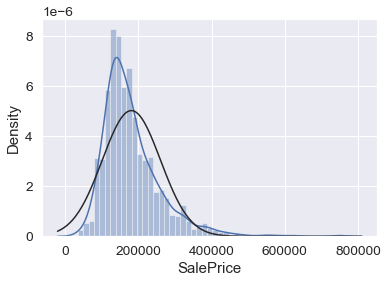

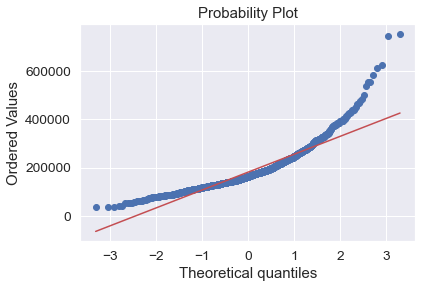

In [43]:
plt.figure()
sns.distplot(df['SalePrice'], fit=norm);
plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

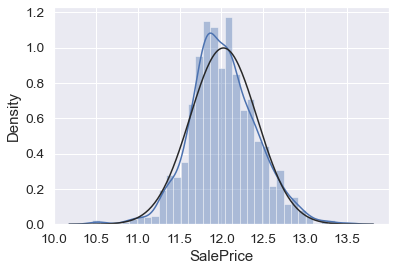

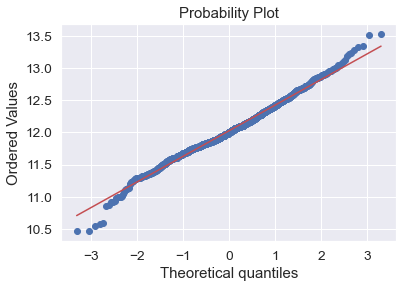

In [44]:
df['SalePrice'] = np.log(df['SalePrice'])
plt.figure()
sns.distplot(df['SalePrice'], fit=norm);
plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

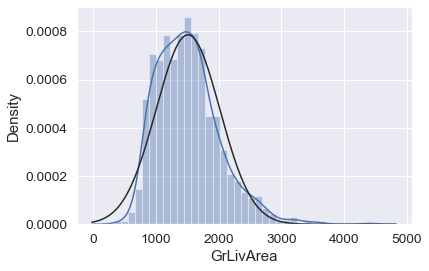

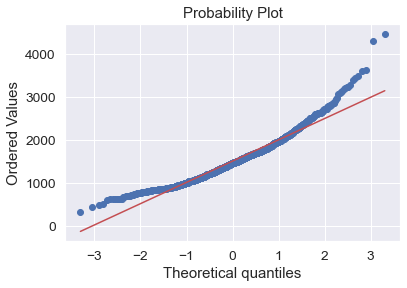

In [45]:
plt.figure()
sns.distplot(df['GrLivArea'], fit=norm);
plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

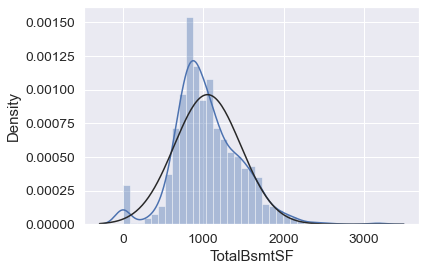

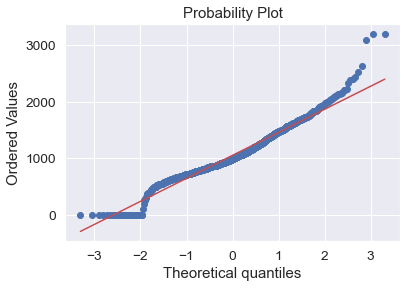

In [46]:
plt.figure()
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

# we see a some houses dont have bsmt so their sqbsmt area is 0 and there are certain number of instances with 0 val
# we cant log transform the data( and normalize it ) unless we remove those values 

In [47]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [48]:
df['HasBsmt'].value_counts()

1    1420
0      37
Name: HasBsmt, dtype: int64

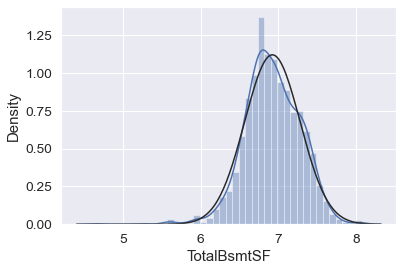

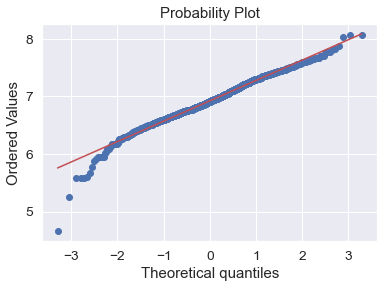

In [49]:
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])
plt.figure()
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# Solving homoscedasticity

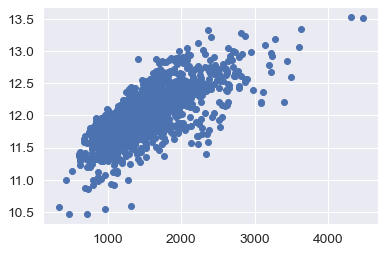

In [50]:
plt.scatter( df['GrLivArea'], df['SalePrice'] )

In [51]:
# Earlier plot showed a conic shape which says variables do not have same variance over their ranges
# applying normality solves this problem

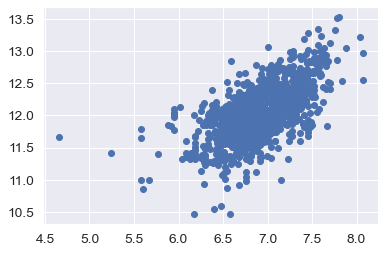

In [52]:
#scatter plot
plt.scatter(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], df[df['TotalBsmtSF']>0]['SalePrice']);

In [53]:
# same way these variable now show equal variance over their ranges

In [54]:
#convert categorical variable into dummy
df = pd.get_dummies(df)

In [55]:
df.shape

(1457, 222)

In [56]:
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [57]:
# Hence the EDA is complete.